In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

from sklearn.metrics import mean_squared_log_error, median_absolute_error, explained_variance_score, max_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('merged.csv')

import pandas as pd

# Read the csv file
df2 = pd.read_csv('merged.csv')
df = pd.read_csv('modified_file2.csv')

# Print the first and last column

# Add all the columns from 1 to 60 as features
features1 = df.iloc[:, 0:60]

Performing Exploratory Data Analysis(EDA)

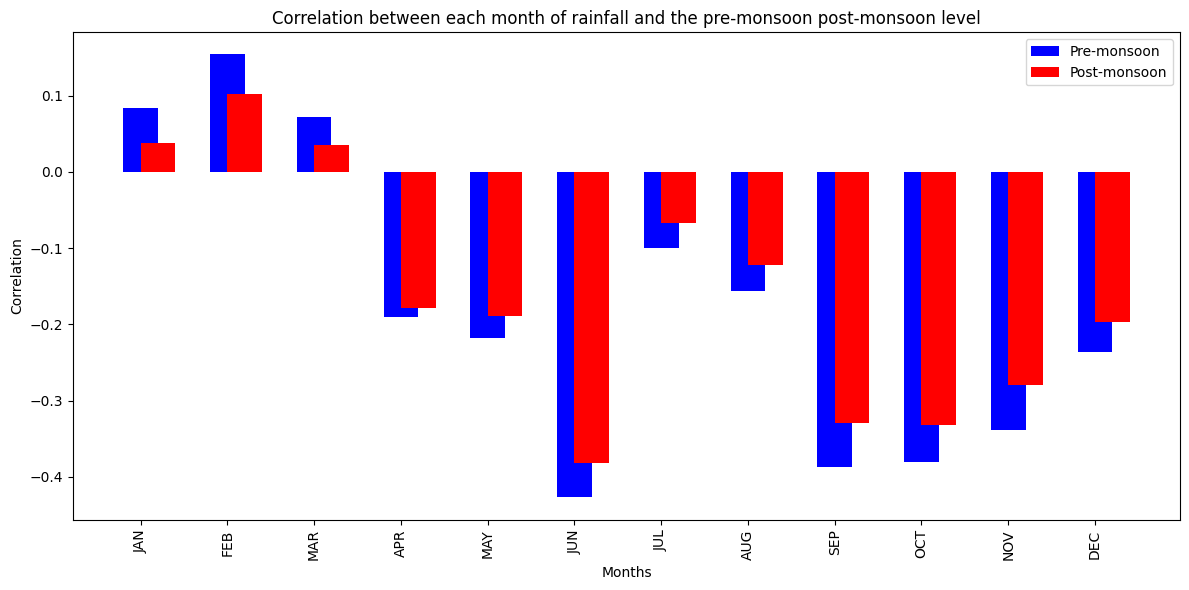

In [31]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

corelation_pre = [df['Post-monsoon_2022 (meters below ground level)'].corr(df[month]) for month in months]
corelation_post = [df['Pre-monsoon_2022 (meters below ground level)'].corr(df[month]) for month in months]

x = range(len(months))

plt.figure(figsize=(12, 6))

plt.bar(x, corelation_pre, width=0.4, label='Pre-monsoon', color='b', align='center')
plt.bar(x, corelation_post, width=0.4, label='Post-monsoon', color='r', align='edge')

plt.xlabel('Months')
plt.ylabel('Correlation')
plt.title('Correlation between each month of rainfall and the pre-monsoon post-monsoon level')
plt.xticks(x, months, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

Now defining the features variables (using the pre & post moonsoon data from 2015 to 2021 )

In [32]:
features = df[['Pre-monsoon_2015 (meters below ground level)', 'Post-monsoon_2015 (meters below ground level)', 'Pre-monsoon_2016 (meters below ground level)', 'Post-monsoon_2016 (meters below ground level)', 'Pre-monsoon_2017 (meters below ground level)', 'Post-monsoon_2017 (meters below ground level)', 'Pre-monsoon_2018 (meters below ground level)', 'Post-monsoon_2018 (meters below ground level)', 'Pre-monsoon_2019 (meters below ground level)', 'Post-monsoon_2019 (meters below ground level)', 'Pre-monsoon_2020 (meters below ground level)', 'Post-monsoon_2020 (meters below ground level)', 'Pre-monsoon_2021 (meters below ground level)', 'Post-monsoon_2021 (meters below ground level)', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', ]]

Defining the target variables. (predicting the pre & post moonsoon data from 2022)

In [9]:
target = df[['Pre-monsoon_2022 (meters below ground level)', 'Post-monsoon_2022 (meters below ground level)']]

Splitting the data into training and testing datasets.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#Currently using 50/50 split
model = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=0))

Evaluation of the model

In [34]:
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f'The model score is {score}')

The model score is 0.9783459617068928


now using random-forest.

In [37]:
model_rf = MultiOutputRegressor(RandomForestRegressor(random_state=0))

# Fit the model
model_rf.fit(X_train, y_train)

# Predict the test set results
y_pred_rf = model_rf.predict(X_test)

# Calculate the R2 score
score_rf = r2_score(y_test, y_pred_rf)


Evaluating random forest model.

In [38]:
print(f'The Random Forest model score is {score_rf}')

The Random Forest model score is 0.9798164257425994


Graphing the models comparitively

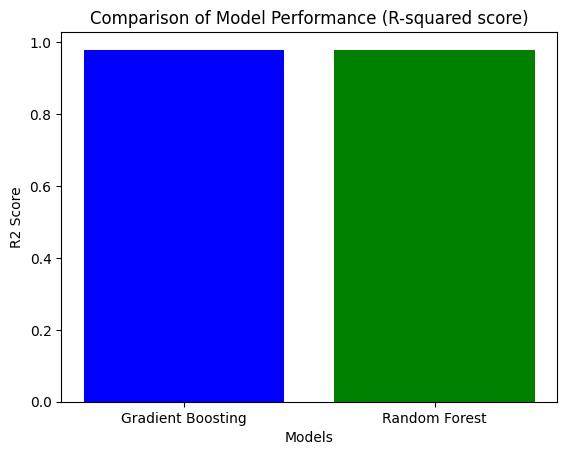

In [14]:
models = ['Gradient Boosting', 'Random Forest']

# Corresponding scores
scores = [score, score_rf]

plt.bar(models, scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of Model Performance (R-squared score)')
plt.show()

Now comparing on other matrices.

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics for Gradient Boosting
mae_gb = mean_absolute_error(y_test, y_pred)
mse_gb = mean_squared_error(y_test, y_pred)
rmse_gb = np.sqrt(mse_gb)

# Calculate metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Define the models and their corresponding metrics
models = ['Gradient Boosting', 'Random Forest']
mae_scores = [mae_gb, mae_rf]
mse_scores = [mse_gb, mse_rf]
rmse_scores = [rmse_gb, rmse_rf]


# Calculate additional metrics for Gradient Boosting
medae_gb = median_absolute_error(y_test, y_pred)
evs_gb = explained_variance_score(y_test, y_pred)

# Calculate additional metrics for Random Forest
medae_rf = median_absolute_error(y_test, y_pred_rf)
evs_rf = explained_variance_score(y_test, y_pred_rf)

# Print all metrics for both models
print("Gradient Boosting Metrics:")
print(f"MAE: {mae_gb}, MSE: {mse_gb}, RMSE: {rmse_gb}, MedAE: {medae_gb}, EVS: {evs_gb}\n")

print("Random Forest Metrics:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, MedAE: {medae_rf}, EVS: {evs_rf}\n")

Gradient Boosting Metrics:
MAE: 1.9429149428403223, MSE: 12.086598530602014, RMSE: 3.4765785667236133, MedAE: 1.1735927874419416, EVS: 0.9783991184776302

Random Forest Metrics:
MAE: 1.8782064062500003, MSE: 11.191027566546873, RMSE: 3.3452993239091287, MedAE: 1.0886000000000005, EVS: 0.9799101558029071


Now using a neural Network.
We are using neural network from tensorflow.

In [41]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential

For simplicity, let's create a model with one hidden layer. The input and output layer sizes should match the number of features and the number of output variables, respectively.

In [43]:

model = Sequential()
model.add(Input(shape=(len(X_train.columns),)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(32))
model.add(Dense(2))  # Output layer
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15241.7861 - val_loss: 950.7344
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 646.0425 - val_loss: 152.6201
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 115.0547 - val_loss: 103.1967
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 77.5340 - val_loss: 79.4806
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 73.2550 - val_loss: 70.5526
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 65.4587 - val_loss: 62.5947
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 62.9609 - val_loss: 56.8803
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 52.8009 - val_loss: 53.7569
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 56.9657 - val_loss: 51.5335
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 36.7618 - val_loss: 50.0284
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 43.5331 - val_loss: 46.0269
Epoch 12/100


In [45]:
# Predict the test set results
y_pred_nn = model.predict(X_test)

# No need to reshape y_pred_nn


mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
medae_nn = median_absolute_error(y_test, y_pred_nn)

evs_nn = explained_variance_score(y_test, y_pred_nn)

print("Neural Network Metrics:")
print(f"MAE: {mae_nn}, MSE: {mse_nn}, RMSE: {rmse_nn}, MedAE: {medae_nn}, EVS: {evs_nn}\n")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
Neural Network Metrics:
MAE: 2.3071025897064246, MSE: 14.254694767758037, RMSE: 3.7755390036070398, MedAE: 1.4986182212829604, EVS: 0.9755011339461782
